In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy.stats import linregress

POSTGRES = {
    'user': 'root',
    'pw': 'FinalProject_2020',
    'db': 'final_project_db',
    'host': 'finalprojectdb.cyj4dabyex0o.us-east-2.rds.amazonaws.com',
    'port': '5432',
}
engine = create_engine('postgresql://%(user)s:\
%(pw)s@%(host)s:%(port)s/%(db)s' % POSTGRES)

In [2]:
Base = automap_base()
Base.prepare(engine,reflect=True)
# reflect the tables
Base.classes.keys()

['aisle_tbl',
 'product_tbl',
 'department_tbl',
 'orders_tbl',
 'orders_product_prior',
 'orders_product_train']

In [3]:
session = Session(engine)

In [4]:
Aisle = Base.classes.aisle_tbl
Product = Base.classes.product_tbl
Department = Base.classes.department_tbl
Orders = Base.classes.orders_tbl
OrdersP = Base.classes.orders_product_prior
OrdersT = Base.classes.orders_product_train

In [5]:
number_of_dep = session.query(Department)
number_of_dep 

In [6]:
last_year_prcp_df = pd.DataFrame(number_of_dep)
last_year_prcp_df

ValueError: DataFrame constructor not properly called!

In [2]:
products_df=pd.read_csv("Data/products.csv")
Orders_df=pd.read_csv("Data/order_products__prior.csv")
departments_df=pd.read_csv("Data/departments.csv")
info_df=pd.read_csv("Data/orders.csv")
aisles_df=pd.read_csv("Data/aisles.csv")

In [8]:
pie_df=pd.merge(products_df,Orders_df, on="product_id", how="outer")

In [9]:
pie_df.head(60)

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,1107.0,7.0,0.0
1,1,Chocolate Sandwich Cookies,61,19,5319.0,3.0,1.0
2,1,Chocolate Sandwich Cookies,61,19,7540.0,4.0,1.0
3,1,Chocolate Sandwich Cookies,61,19,9228.0,2.0,0.0
4,1,Chocolate Sandwich Cookies,61,19,9273.0,30.0,0.0
5,1,Chocolate Sandwich Cookies,61,19,9696.0,5.0,1.0
6,1,Chocolate Sandwich Cookies,61,19,11140.0,1.0,1.0
7,1,Chocolate Sandwich Cookies,61,19,11485.0,4.0,0.0
8,1,Chocolate Sandwich Cookies,61,19,12672.0,3.0,1.0
9,1,Chocolate Sandwich Cookies,61,19,13668.0,4.0,1.0


In [59]:
pie_ai=pd.merge(pie_df,aisles_df, on="aisle_id", how="outer")

In [60]:
pie_ai.head(10)

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,aisle
0,1,Chocolate Sandwich Cookies,61,19,1107.0,7.0,0.0,cookies cakes
1,1,Chocolate Sandwich Cookies,61,19,5319.0,3.0,1.0,cookies cakes
2,1,Chocolate Sandwich Cookies,61,19,7540.0,4.0,1.0,cookies cakes
3,1,Chocolate Sandwich Cookies,61,19,9228.0,2.0,0.0,cookies cakes
4,1,Chocolate Sandwich Cookies,61,19,9273.0,30.0,0.0,cookies cakes
5,1,Chocolate Sandwich Cookies,61,19,9696.0,5.0,1.0,cookies cakes
6,1,Chocolate Sandwich Cookies,61,19,11140.0,1.0,1.0,cookies cakes
7,1,Chocolate Sandwich Cookies,61,19,11485.0,4.0,0.0,cookies cakes
8,1,Chocolate Sandwich Cookies,61,19,12672.0,3.0,1.0,cookies cakes
9,1,Chocolate Sandwich Cookies,61,19,13668.0,4.0,1.0,cookies cakes


In [41]:
pie_df_2=pd.merge(pie_df,departments_df, on="department_id", how="outer")

In [11]:
pie_df_2.head(60)

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,department
0,1,Chocolate Sandwich Cookies,61,19,1107.0,7.0,0.0,snacks
1,1,Chocolate Sandwich Cookies,61,19,5319.0,3.0,1.0,snacks
2,1,Chocolate Sandwich Cookies,61,19,7540.0,4.0,1.0,snacks
3,1,Chocolate Sandwich Cookies,61,19,9228.0,2.0,0.0,snacks
4,1,Chocolate Sandwich Cookies,61,19,9273.0,30.0,0.0,snacks
5,1,Chocolate Sandwich Cookies,61,19,9696.0,5.0,1.0,snacks
6,1,Chocolate Sandwich Cookies,61,19,11140.0,1.0,1.0,snacks
7,1,Chocolate Sandwich Cookies,61,19,11485.0,4.0,0.0,snacks
8,1,Chocolate Sandwich Cookies,61,19,12672.0,3.0,1.0,snacks
9,1,Chocolate Sandwich Cookies,61,19,13668.0,4.0,1.0,snacks


In [17]:
ps=pie_df.groupby(["product_name"])
o_ps= ps["order_id"].nunique()
order_product=pd.DataFrame(o_ps)
order_product.columns=["Total_product"]
order_product.sort_values(by=['Total_product'], inplace=True, ascending=False)
order_product=order_product.reset_index()
product_name=order_product["product_name"]
order_product

,product_name,Total_product
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


In [55]:
Top_order_product2=pd.DataFrame(order_product.head(10))
others2=order_product.Total_product.iloc[10:].sum()
df3 = pd.DataFrame({"product_name":["Others"],"Total_product":[others2]})
Top_order_product2=Top_order_product2.append(df3,ignore_index=True)
Top_order_product2

,product_name,Total_product
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


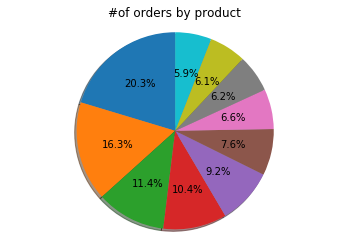

In [56]:
plt.title("#of orders by product")
plt.pie(Top_order_product["Total_product"],
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()


In [42]:
ds=pie_df_2.groupby(["department"])
o_ds= ds["order_id"].nunique()
order_departments=pd.DataFrame(o_ds)
order_departments.columns=["Total_departments"]
order_departments.sort_values(by=['Total_departments'], inplace=True, ascending=False)
order_departments=order_departments.reset_index()
department=order_departments["department"]
Total_Count_by_departments=order_departments["Total_departments"]
order_departments

,department,Total_departments
0,produce,2409320
1,dairy eggs,2177338
2,beverages,1457351
3,snacks,1391447
4,frozen,1181018
5,pantry,1117892
6,bakery,881556
7,deli,770300
8,canned goods,681305
9,dry goods pasta,597862


In [51]:
order_departments2=pd.DataFrame(order_departments.head(10))
others=order_departments.Total_departments.iloc[10:].sum()
df2 = pd.DataFrame({"department":["Others"],"Total_departments":[others]})
order_departments2=order_departments2.append(df2,ignore_index=True)
order_departments2=order_departments2
order_departments2


,department,Total_departments
0,produce,2409320
1,dairy eggs,2177338
2,beverages,1457351
3,snacks,1391447
4,frozen,1181018
5,pantry,1117892
6,bakery,881556
7,deli,770300
8,canned goods,681305
9,dry goods pasta,597862


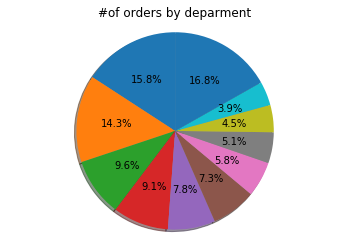

In [52]:
plt.title("#of orders by deparment")
plt.pie(order_departments2["Total_departments"],
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()


In [61]:
ai=pie_ai.groupby(["aisle"])
o_ai= ai["order_id"].nunique()
order_aisle=pd.DataFrame(o_ai)
order_aisle.columns=["Total_aisle"]
order_aisle.sort_values(by=['Total_aisle'], inplace=True, ascending=False)
order_aisle=order_aisle.reset_index()
aisle=order_aisle["aisle"]
Total_Count_by_aisle=order_aisle["Total_aisle"]
order_aisle

,aisle,Total_aisle
0,fresh fruits,1790771
1,fresh vegetables,1427631
2,packaged vegetables fruits,1179243
3,yogurt,847081
4,milk,785987
5,packaged cheese,737899
6,water seltzer sparkling water,614081
7,soy lactosefree,545714
8,chips pretzels,538052
9,bread,527129


In [63]:
order_aisle2=pd.DataFrame(order_aisle.head(10))
aisle=order_aisle.Total_aisle.iloc[10:].sum()
df4 = pd.DataFrame({"aisle":["Others"],"Total_aisle":[aisle]})
order_aisle2=order_aisle2.append(df4,ignore_index=True)
order_aisle2

,aisle,Total_aisle
0,fresh fruits,1790771
1,fresh vegetables,1427631
2,packaged vegetables fruits,1179243
3,yogurt,847081
4,milk,785987
5,packaged cheese,737899
6,water seltzer sparkling water,614081
7,soy lactosefree,545714
8,chips pretzels,538052
9,bread,527129


In [64]:
order_aisle2.to_json(r'Data\aisle.json', orient='records')

In [54]:
order_departments2.to_json(r'Data\department.json', orient='records')

In [57]:
Top_order_product2.to_json(r'Data\products.json', orient='records')

In [3]:
tab_df=pd.merge(Orders_df,info_df, on="order_id", how="outer")

In [4]:
tab_df

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120.0,1.0,1.0,202279,prior,3,5,9,8.0
1,2,28985.0,2.0,1.0,202279,prior,3,5,9,8.0
2,2,9327.0,3.0,0.0,202279,prior,3,5,9,8.0
3,2,45918.0,4.0,1.0,202279,prior,3,5,9,8.0
4,2,30035.0,5.0,0.0,202279,prior,3,5,9,8.0
5,2,17794.0,6.0,1.0,202279,prior,3,5,9,8.0
6,2,40141.0,7.0,1.0,202279,prior,3,5,9,8.0
7,2,1819.0,8.0,1.0,202279,prior,3,5,9,8.0
8,2,43668.0,9.0,0.0,202279,prior,3,5,9,8.0
9,3,33754.0,1.0,1.0,205970,prior,16,5,17,12.0


In [39]:
uo=tab_df.groupby(["user_id"])
o_u= uo["order_id"].nunique()
order_user=pd.DataFrame(o_u)
order_user.columns=["Total_user"]
order_user.sort_values(by=['Total_user'], inplace=True, ascending=False)
order_user=order_user.reset_index()
user=order_user["user_id"]
Total_Count_by_user=order_user["Total_user"]
order_user

,user_id,Total_user
0,152340,100
1,185641,100
2,185524,100
3,81678,100
4,70922,100
5,136870,100
6,81704,100
7,119932,100
8,119835,100
9,91035,100


In [22]:
dho=tab_df.groupby(["order_dow","order_hour_of_day"])["order_id"].aggregate("count").reset_index()
dho

,order_dow,order_hour_of_day,order_id
0,0,0,39120
1,0,1,22686
2,0,2,12835
3,0,3,8926
4,0,4,8435
5,0,5,11723
6,0,6,35178
7,0,7,134274
8,0,8,308384
9,0,9,444099


In [14]:
dho.order_id.max()

568964

In [15]:
dho.order_id.min()

5826

In [23]:
dho.order_dow=dho.order_dow.replace(0, "Monday")
dho.order_dow=dho.order_dow.replace(1, "Tuesday")
dho.order_dow=dho.order_dow.replace(2, "Wednesday ")
dho.order_dow=dho.order_dow.replace(3, "Thursday")
dho.order_dow=dho.order_dow.replace(4, "Friday")
dho.order_dow=dho.order_dow.replace(5, "Saturday")
dho.order_dow=dho.order_dow.replace(6, "Sunday")
dho

,order_dow,order_hour_of_day,order_id
0,Monday,0,39120
1,Monday,1,22686
2,Monday,2,12835
3,Monday,3,8926
4,Monday,4,8435
5,Monday,5,11723
6,Monday,6,35178
7,Monday,7,134274
8,Monday,8,308384
9,Monday,9,444099


In [25]:
dho.to_json(r'Data\dayhour1.json', orient='records')